In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv("data.csv", delimiter=",", skipinitialspace=True)
df.columns = df.columns.str.strip()

In [54]:
df

,FlowId,Time,RTT,Cwnd,Throughput,Loss,GainCwnd,PacingRate,minRTT,bdp,LastBdp,mode,SlowStart,ssThresh
0,1,2,0.06,5360,0.864,0,4,0,10.00,4,0,2,0,4294967295
1,1,3,0.06,36978,2364.190,0,4,0,0.06,24652,24652,2,1,4294967295
2,1,4,0.26,54658,1150.050,0,4,0,0.06,36439,36439,3,1,4294967295
3,1,5,0.06,4,478.272,0,4,0,0.06,2600,36439,0,0,4
4,1,6,0.26,186,14.112,0,4,0,0.06,124,124,2,1,33554432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,3,57,0.32,536,4.704,1,4,0,0.32,4,0,2,1,33554432
104,1,58,0.26,4,4.704,0,4,0,0.26,536,536,0,1,4
105,3,58,0.32,804,14.112,0,4,0,0.32,536,536,2,1,33554432
106,1,59,0.26,536,14.112,0,4,0,0.26,4,0,3,1,33554432


In [55]:
# Separate the flows
flow1 = df[df['FlowId'] == 1]
flow3 = df[df['FlowId'] == 3]

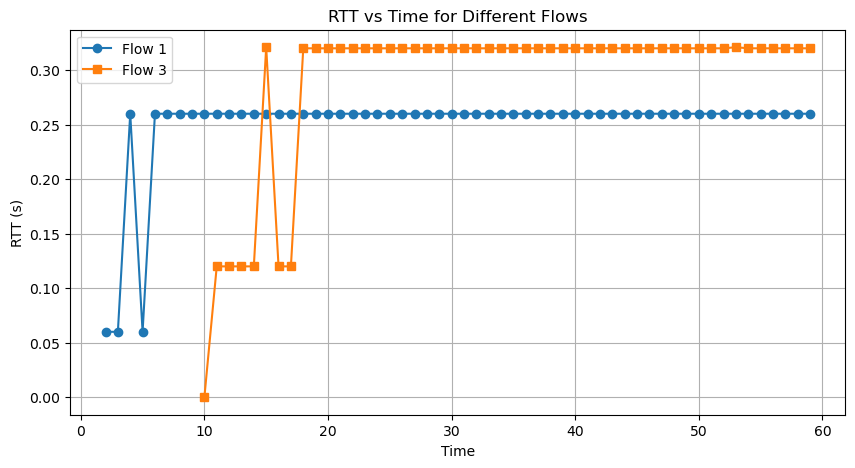

In [56]:
# Plot RTT vs Time
plt.figure(figsize=(10, 5))
plt.plot(flow1['Time'], flow1['RTT'], marker='o', linestyle='-', label='Flow 1')
plt.plot(flow3['Time'], flow3['RTT'], marker='s', linestyle='-', label='Flow 3')

# Labels and title
plt.xlabel("Time")
plt.ylabel("RTT (s)")
plt.title("RTT vs Time for Different Flows")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [57]:
flow1

,FlowId,Time,RTT,Cwnd,Throughput,Loss,GainCwnd,PacingRate,minRTT,bdp,LastBdp,mode,SlowStart,ssThresh
0,1,2,0.06,5360,0.864,0,4,0,10.00,4,0,2,0,4294967295
1,1,3,0.06,36978,2364.190,0,4,0,0.06,24652,24652,2,1,4294967295
2,1,4,0.26,54658,1150.050,0,4,0,0.06,36439,36439,3,1,4294967295
3,1,5,0.06,4,478.272,0,4,0,0.06,2600,36439,0,0,4
4,1,6,0.26,186,14.112,0,4,0,0.06,124,124,2,1,33554432
5,1,7,0.26,536,4.704,0,4,0,0.26,4,0,2,1,33554432
6,1,8,0.26,804,18.816,0,4,0,0.26,536,536,2,1,33554432
7,1,9,0.26,4,4.704,0,4,0,0.26,536,536,0,1,4
8,1,10,0.26,536,14.112,1,4,0,0.26,4,0,3,1,33554432
10,1,11,0.26,804,14.112,0,4,0,0.26,536,536,3,1,33554432


In [58]:
flow3

,FlowId,Time,RTT,Cwnd,Throughput,Loss,GainCwnd,PacingRate,minRTT,bdp,LastBdp,mode,SlowStart,ssThresh
9,3,10,0.000,4,0.448,1,4,0,10.00,4,0,2,0,33554432
11,3,11,0.120,5360,0.416,0,4,0,10.00,4,0,2,0,4294967295
13,3,12,0.120,12864,651.936,24,4,0,0.12,8576,8576,3,1,4294967295
15,3,13,0.120,40195,1150.300,0,4,0,0.12,26797,26797,2,1,4294967295
17,3,14,0.120,88432,4566.720,164,4,0,0.12,58955,58955,3,1,4294967295
19,3,15,0.321,131839,1153.820,0,4,0,0.12,87893,87893,2,1,4294967295
21,3,16,0.120,4,5775.360,0,4,0,0.12,131056,131056,0,0,4
23,3,17,0.120,536,4.704,0,4,0,0.12,4,0,2,0,33554432
25,3,18,0.320,301,9.408,0,4,0,0.12,201,201,2,1,33554432
27,3,19,0.320,536,4.704,0,4,0,0.32,4,0,2,1,33554432


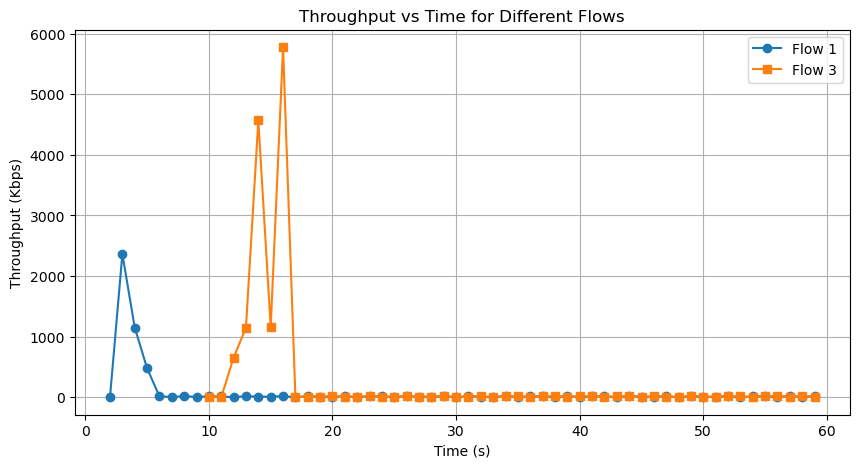

In [59]:
# Plot RTT vs Time
plt.figure(figsize=(10, 5))
plt.plot(flow1['Time'], flow1['Throughput'], marker='o', linestyle='-', label='Flow 1')
plt.plot(flow3['Time'], flow3['Throughput'], marker='s', linestyle='-', label='Flow 3')

# Labels and title
plt.xlabel("Time (s)")
plt.ylabel("Throughput (Kbps)")
plt.title("Throughput vs Time for Different Flows")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()